In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-csv/Titanic.csv


In [31]:
df = pd.read_csv('/kaggle/input/titanic-csv/Titanic.csv')

In [32]:
# Первый просмотр нашего датасета
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


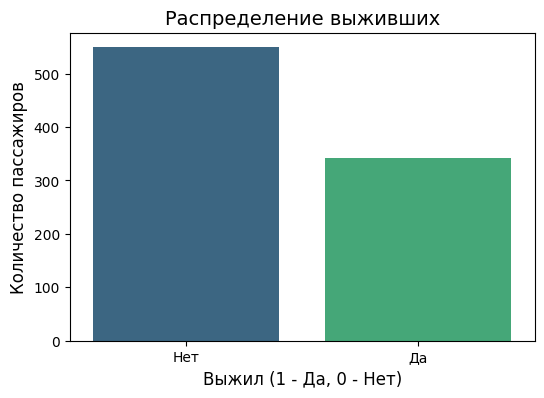

In [33]:
# Строим график сколько человек осталось в живых
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=df, palette="viridis")
plt.title("Распределение выживших", fontsize=14)
plt.xlabel("Выжил (1 - Да, 0 - Нет)", fontsize=12)
plt.ylabel("Количество пассажиров", fontsize=12)
plt.xticks(ticks=[0,1], labels=["Нет", "Да"], fontsize=10)
plt.show()

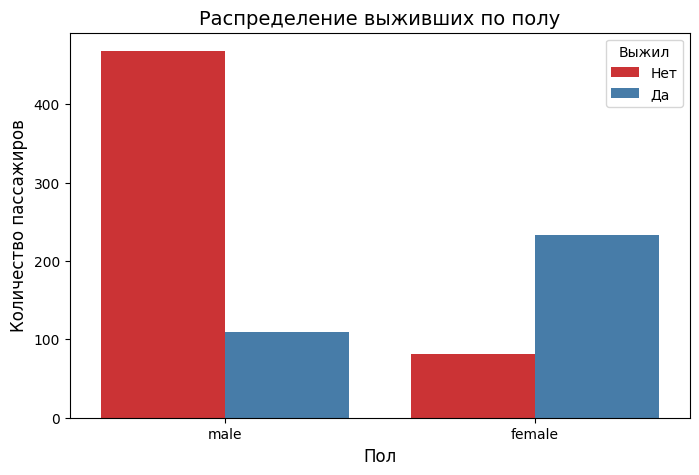

In [34]:
# Распределение выживших по полу.
plt.figure(figsize=(8, 5)) 
sns.countplot(x="Sex", hue="Survived", data=df, palette="Set1") 
plt.title("Распределение выживших по полу", fontsize=14) 
plt.xlabel("Пол", fontsize=12) 
plt.ylabel("Количество пассажиров", fontsize=12) 
plt.legend(title="Выжил", labels=["Нет", "Да"], fontsize=10) 
plt.show()

# Мы видим, что женщин выжило больше, чем мужчин. Также можно увидеть, что из общего числа женщин выживших больше.

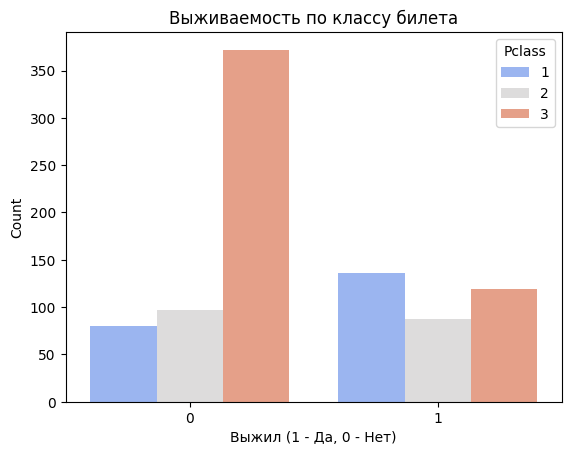

In [35]:
# Визуализация по классу
sns.countplot(data=df, x="Survived", hue="Pclass", palette="coolwarm")
plt.title("Выживаемость по классу билета")
plt.xlabel("Выжил (1 - Да, 0 - Нет)")
plt.ylabel("Count")
plt.show()

# Пассажиры первого класса имели больше шансов выжить

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


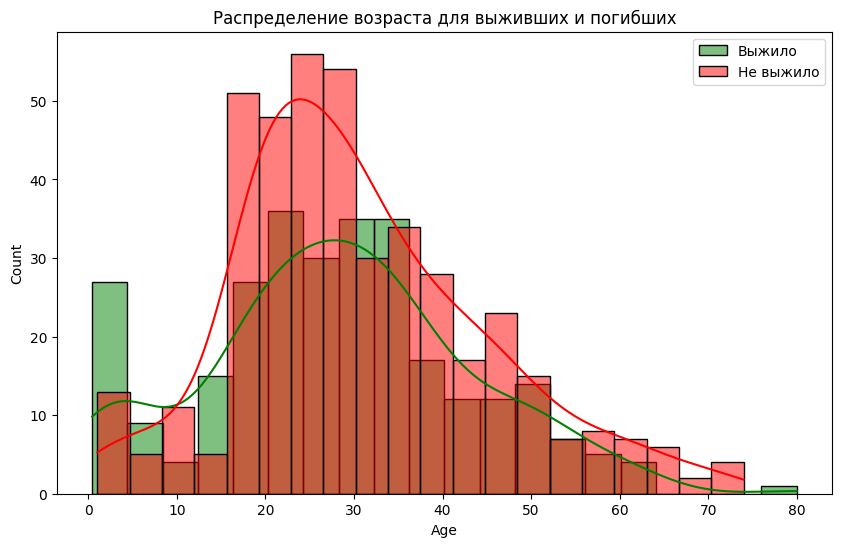

In [36]:
# Посмотри, как возраст влияет на выживаемость
# Гистограмма возраста для выживших и погибших
plt.figure(figsize=(10, 6))
sns.histplot(df[df["Survived"] == 1]["Age"], kde=True, color="green", label="Выжило", bins=20)
sns.histplot(df[df["Survived"] == 0]["Age"], kde=True, color="red", label="Не выжило", bins=20)
plt.title("Распределение возраста для выживших и погибших")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

# Больше всего выживших я увидел среди детей

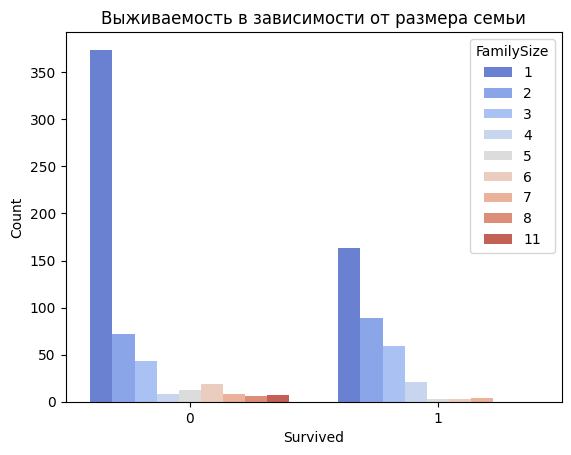

In [37]:
# Посмотрим на выживаемость людей с семьёй и без
# Создаем новый признак "FamilySize" = SibSp + Parch + 1
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Выживаемость в зависимости от размера семьи
sns.countplot(data=df, x="Survived", hue="FamilySize", palette="coolwarm")
plt.title("Выживаемость в зависимости от размера семьи")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

# Можно увидеть, что люди без членов семьи выживали намного больше

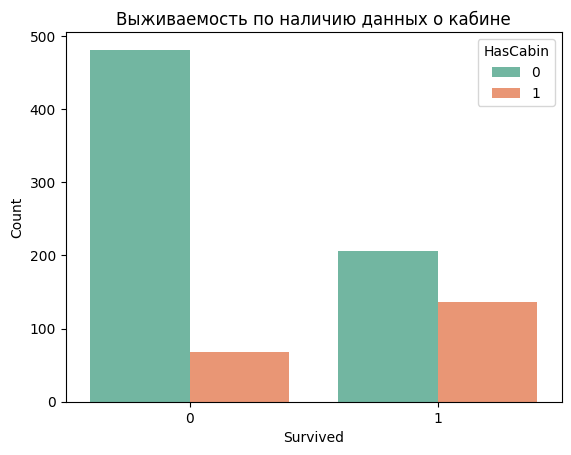

In [38]:
# Cabin так как этот признак имеет много пропусков, можно исследовать, как наличие данных в этом столбце влияет на выживаемость.
# График по наличию данных в "Cabin"
df['HasCabin'] = df['Cabin'].notnull().astype(int)
sns.countplot(data=df, x="Survived", hue="HasCabin", palette="Set2")
plt.title("Выживаемость по наличию данных о кабине")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

In [39]:
# На основе сделанных выводов можно создать несколько новых признаков:
# Пол (Sex): Преобразуем этот признак в числовой формат (мужчины = 0, женщины = 1).
# Размер семьи (FamilySize): Мы уже создали этот признак.
# Возраст (Age): Для пропущенных значений возраста можно использовать медиану по соответствующим группам (например, медиана по классу и полу).
# Наличие каюты (HasCabin): Мы создали бинарный признак.

# Преобразуем Sex в числовой
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Заполняем пропущенные значения для возраста медианой по классу
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'), inplace=True)

In [40]:
# Извлекаем титул из имени
df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\.', expand=False)

# Группируем редкие титулы (для сокращения числа категорий)
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# Преобразуем в числовые категориальные значения
df['Title'] = df['Title'].map({
    'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5
}).fillna(0)

# Проверим, как выглядит результат
df[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",1.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",3.0
2,"Heikkinen, Miss. Laina",2.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3.0
4,"Allen, Mr. William Henry",1.0


In [41]:
# Извлекаем буквенную часть билета (если есть)
df['TicketPrefix'] = df['Ticket'].str.extract(r'([A-Za-z]+)', expand=False).fillna('None')

# Преобразуем буквенные префиксы в числовые категории
df['TicketPrefix'] = df['TicketPrefix'].astype('category').cat.codes

# Проверим результат
df[['Ticket', 'TicketPrefix']].head()

,Ticket,TicketPrefix
0,A/5 21171,0
1,PC 17599,8
2,STON/O2. 3101282,15
3,113803,6
4,373450,6


In [42]:
# Заполняем пропуски в Embarked наиболее частым значением
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Преобразуем Embarked в числовой формат
df['Embarked'] = df['Embarked'].astype('category').cat.codes

In [43]:
# Удаляем не нужные по моему мнению столбцы
df.drop(columns=['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'PassengerId'], inplace=True)

In [44]:
# Смотрим на типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    int64  
 3   Age           891 non-null    float64
 4   Fare          891 non-null    float64
 5   Embarked      891 non-null    int8   
 6   FamilySize    891 non-null    int64  
 7   HasCabin      891 non-null    int64  
 8   Title         891 non-null    float64
 9   TicketPrefix  891 non-null    int8   
dtypes: float64(3), int64(5), int8(2)
memory usage: 57.6 KB


In [45]:
# Целевая переменная (y) и признаки (X)
X = df.drop(columns=['Survived']).values
y = df['Survived'].values

In [46]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Кросс-валидация
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

all_classification_reports = []
confusion_matrices = []
accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), 1):
    print(f"\n=== Fold {fold} ===")

    # Разделение данных на обучающую и валидационную выборки
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Построение модели
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(16, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # Компиляция модели
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    # Обучение модели
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Оценка модели
    y_val_pred = (model.predict(X_val) > 0.5).astype(int)
    report = classification_report(y_val, y_val_pred, target_names=['Not Survived', 'Survived'])
    conf_matrix = confusion_matrix(y_val, y_val_pred)

    all_classification_reports.append(report)
    confusion_matrices.append(conf_matrix)

    accuracy = np.mean(y_val_pred.flatten() == y_val)
    accuracies.append(accuracy)

    # Вывод метрик
    print(report)
    print(f"Confusion Matrix for Fold {fold}:")
    print(conf_matrix)

# Итоговые результаты
print("\n=== Итоги по всем фолдам ===")
for i, (report, conf_matrix) in enumerate(zip(all_classification_reports, confusion_matrices), 1):
    print(f"Fold {i}:")
    print(report)
    tn, fp, fn, tp = conf_matrix.ravel()
    print(f"- FP (False Positive): {fp} — Модель предсказала, что человек погибнет, а по факту он выжил.")
    print(f"- FN (False Negative): {fn} — Модель предсказала, что человек выживет, а по факту он погиб.")
    print(f"- TN (True Negative): {tn} — Модель правильно предсказала, что человек погиб.")
    print(f"- TP (True Positive): {tp} — Модель правильно предсказала, что человек выжил.")

avg_accuracy = np.mean(accuracies)
print(f"\nСредняя точность по всем фолдам: {avg_accuracy:.4f}")


=== Fold 1 ===
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4739 - loss: 0.9087 - val_accuracy: 0.3872 - val_loss: 0.9827 - learning_rate: 0.0010
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5779 - loss: 0.7512 - val_accuracy: 0.5926 - val_loss: 0.7803 - learning_rate: 0.0010
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5808 - loss: 0.7774 - val_accuracy: 0.6599 - val_loss: 0.6799 - learning_rate: 0.0010
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5618 - loss: 0.6988 - val_accuracy: 0.6734 - val_loss: 0.6376 - learning_rate: 0.0010
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6063 - loss: 0.6776 - val_accuracy: 0.6869 - val_loss: 0.6203 - learning_rate: 0.0010
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6387 - loss: 0.6769 - val_accuracy: 0.7104 - val_loss: 0.6063 - learning_rate: 0.0010
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6889 - loss: 0.6405 - val_accuracy: 0.7172 - v

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4908 - loss: 0.8115 - val_accuracy: 0.5993 - val_loss: 0.6977 - learning_rate: 0.0010
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5792 - loss: 0.7151 - val_accuracy: 0.6465 - val_loss: 0.6650 - learning_rate: 0.0010
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5821 - loss: 0.7183 - val_accuracy: 0.6869 - val_loss: 0.6441 - learning_rate: 0.0010
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5953 - loss: 0.7236 - val_accuracy: 0.6902 - val_loss: 0.6275 - learning_rate: 0.0010
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6774 - loss: 0.6130 - val_accuracy: 0.6869 - val_loss: 0.6110 - learning_rate: 0.0010
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6536 - loss: 0.6348 - val_accuracy: 0.7071 - val_loss: 0.5964 - learning_rate: 0.0010
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6861 - loss: 0.6171 - val_accuracy: 0.7273 - v

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6140 - loss: 0.7639 - val_accuracy: 0.4882 - val_loss: 0.9078 - learning_rate: 0.0010
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6819 - loss: 0.7061 - val_accuracy: 0.6667 - val_loss: 0.6798 - learning_rate: 0.0010
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6062 - loss: 0.7100 - val_accuracy: 0.6835 - val_loss: 0.6334 - learning_rate: 0.0010
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6525 - loss: 0.6692 - val_accuracy: 0.6835 - val_loss: 0.6223 - learning_rate: 0.0010
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6356 - loss: 0.6847 - val_accuracy: 0.6902 - val_loss: 0.6149 - learning_rate: 0.0010
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6898 - loss: 0.6417 - val_accuracy: 0.6936 - val_loss: 0.6053 - learning_rate: 0.0010
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6650 - loss: 0.6185 - val_accuracy: 0.6902 - v

In [47]:
# На основе приведенных данных сделаем выводы:

# Средняя точность по всем фолдам:

# Средняя точность модели составляет 0.8081. Это стабильный результат, однако видна небольшая разница между фолдами.
# Матрица ошибок:

# Fold 1:
# FP (False Positive): 30 — Модель предсказала, что человек погибнет, а по факту он выжил.
# FN (False Negative): 24 — Модель предсказала, что человек выживет, а по факту он погиб.
# TN (True Negative): 153 — Модель правильно предсказала, что человек погиб.
# TP (True Positive): 90 — Модель правильно предсказала, что человек выжил.

# Fold 2:
# FP (False Positive): 33 — Модель предсказала, что человек погибнет, а по факту он выжил.
# FN (False Negative): 25 — Модель предсказала, что человек выживет, а по факту он погиб.
# TN (True Negative): 150 — Модель правильно предсказала, что человек погиб.
# TP (True Positive): 89 — Модель правильно предсказала, что человек выжил.

# Fold 3:
# FP (False Positive): 31 — Модель предсказала, что человек погибнет, а по факту он выжил.
# FN (False Negative): 28 — Модель предсказала, что человек выживет, а по факту он погиб.
# TN (True Negative): 152 — Модель правильно предсказала, что человек погиб.
# TP (True Positive): 86 — Модель правильно предсказала, что человек выжил.
# Анализ результатов:

# Наибольшее количество ложноположительных предсказаний (FP) было в Fold 2, что могло снизить итоговую метрику.
# Fold 1 показал лучшие результаты благодаря меньшему числу FN и FP, что говорит о хорошей способности модели находить баланс.
# В Fold 3 модель продемонстрировала самые низкие показатели TP, что повлияло на итоговый результат.